# The Deutsch-Jozsa Algorithm

## **Victor Onofre**

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib

In [2]:
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

The Deutsch–Jozsa algorithm solves the generalization of the problem solved by the Deutsch algorithm.As with the Deutsch algorithm, we are given  an unknown function $f$ , but this time $f$ is a function from n-bit strings to a single bit:

$$f : \{0,1\}^{n} \rightarrow \{0,1\} $$

$f$ is either **constant**  $\rightarrow$  $f(x)$ is the same for all $x$ 

or

$f$ is **balanced**  $\rightarrow$  $f(x) = 0$  for exactly half of the input strings $x$, and $f(x) = 1$ for the other half of the inputs 


The problem here is to determine whether $f$ is constant, or balanced, by making queries to the circuit for $f$ .

The oracle can be expressed as a unitary operator:

$$ U_{f} |  x>  | y > =  |  x > | y \oplus f(x) > $$

where $x$ is an n-bit string

In [3]:
qregA = QuantumRegister(1, name = 'qubit A')
qregB = QuantumRegister(1, name = 'qubit B')
qregC = QuantumRegister(1, name = 'qubit C')
register1 = ClassicalRegister(2) 

qc = QuantumCircuit(qregA, qregB, qregC ,register1 )

# Initial state for 2-bits

In this case we have 2 bits $\{ x_{A},x_{B} \}$, we want to known if the function $f \rightarrow f( \{ x_{A},x_{B} \} )$ is balanced or constant

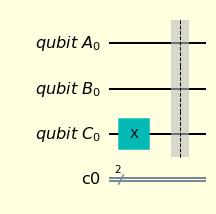

In [4]:
qc.x(qregC)
qc.barrier()
qc.draw(output='mpl', style=style) 

The initial stae is $ | 0 > |0>  |0>$, we apply the $x$ gate to the second qubit and obtain $ | \psi_{0} > =  | 0 > |0> | 1 >$

$$ | \psi_{0} >_{ABC} =  | 0  >_{A} |0>_{B} X | 0  >_{C}=  | 0  >_{A}|0>_{B} | 1 >_{C} $$

## Apply Hadamard gate to qubit C

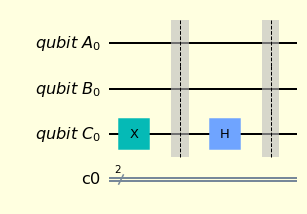

In [5]:
qc.h(qregC)
qc.barrier()
qc.draw(output='mpl', style=style) 

Apply the Hadamard gate to the the state $|1>_{C}$, 

$$ | \psi_{1} >_{ABC} = (I \otimes I \otimes H) | \psi_{0}>_{ABC} = I | 0 >_{A} I | 0 >_{B}  H | 1 >_{C}=  | 0 >_{A}  | 0 >_{B} \frac{1}{\sqrt{2}} \Big(  | 0 >_{C}  -  | 1 >_{C} \Big)$$

## Apply Hadamard gates to qubit A and B

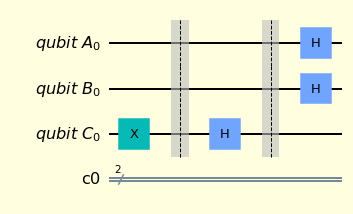

In [6]:
qc.h(qregA)
qc.h(qregB)
qc.draw(output='mpl', style=style) 

Apply the Hadamard gate to the the state $|0>_{A}$ and $|0>_{B}$, 

$$ | \psi_{2} >_{ABC} = (H \otimes H \otimes I) | \psi_{1}>_{ABC} = H | 0 >_{A} H | 0 >_{B} I \frac{1}{\sqrt{2}} \Big(  | 0 >_{C}  -  | 1 >_{C} \Big) $$

$$  = \frac{1}{\sqrt{2}} \Big(  | 0 >_{C}  +  | 1 >_{C} \Big) \frac{1}{\sqrt{2}} \Big(  | 0 >_{C}  +  | 1 >_{C} \Big)  \frac{1}{\sqrt{2}} \Big(  | 0 >_{C}  -  | 1 >_{C} \Big)  $$


$$ | \psi_{2} >_{ABC} = \frac{1}{2} \Big( |0>_{A}|0>_{B} + |0>_{A} |1>_{B} + |1>_{A} |0>_{B} + |1>_{A} |1>_{B}  \Big) \frac{1}{\sqrt{2}} \Big(  | 0 >_{C}  -  | 1 >_{C} \Big) $$

## Oracle $U_{f}$
## Function f(x) balanced

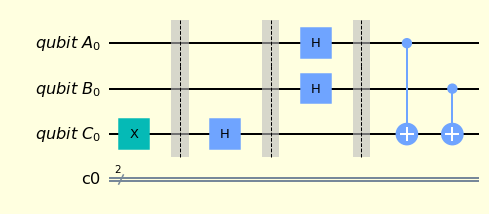

In [7]:
qc.barrier()
qc.cx(qregA,qregC)
qc.cx(qregB,qregC)
qc.draw(output='mpl', style=style) 

# Apply a balanced oracle $\Big( CNOT_{BC} CNOT_{AC} \Big) $

$$ |\psi_{3} >_{ABC} = CNOT_{BC} CNOT_{AC}| \psi_{2} >_{ABC} =  CNOT_{BC} CNOT_{AC} \frac{1}{2} \Big( |0>_{A}|0>_{B} + |0>_{A} |1>_{B} + |1>_{A} |0>_{B} + |1>_{A} |1>_{B}  \Big) \frac{1}{\sqrt{2}} \Big(  | 0 >_{C}  -  | 1 >_{C} \Big) $$

$$ =  CNOT_{BC} CNOT_{AC} \frac{1}{2} \Big[ |0>_{A}|0>_{B} \frac{1}{\sqrt{2}}   \Big( |0 >_{C}  - | 1 >_{C} \Big)  + |0>_{A} |1>_{B}  \frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  -  | 1 >_{C} \Big) $$ 
$$ + |1>_{A} |0>_{B} \frac{1}{\sqrt{2}} \Big(  |0 >_{C}  -  | 1 >_{C} \Big)   + |1>_{A} |1>_{B} \frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  - | 1 >_{C} \Big)   \Big]  $$


$$ =   \frac{1}{2} \Big[ CNOT_{BC} CNOT_{AC} |0>_{A}|0>_{B} \frac{1}{\sqrt{2}}   \Big(  |0 >_{C}  -  | 1 >_{C} \Big)  + CNOT_{BC} CNOT_{AC} |0>_{A} |1>_{B}  \frac{1}{\sqrt{2}} \Big(  |0 >_{C}  - | 1 >_{C} \Big) $$ 
$$ + CNOT_{BC} CNOT_{AC} |1>_{A} |0>_{B} \frac{1}{\sqrt{2}} \Big(  |0 >_{C}  - | 1 >_{C} \Big)   + CNOT_{BC} CNOT_{AC} |1>_{A} |1>_{B}  \frac{1}{\sqrt{2}}  \Big( |0 >_{C}  -  | 1 >_{C} \Big)   \Big]  $$

We apply the CNOT with qubit $A$ as control and qubit $C$ as target

$$ |\psi_{3} >_{ABC} =    \frac{1}{2} \Big[ CNOT_{BC} |0>_{A}|0>_{B} \frac{1}{\sqrt{2}}   \Big( |0 >_{C}  -  | 1 >_{C} \Big)  + CNOT_{BC}  |0>_{A} |1>_{B} \frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  -  | 1 >_{C} \Big) $$ 
$$ + CNOT_{BC} |1>_{A} |0>_{B} \frac{1}{\sqrt{2}} \Big(  |1 >_{C}  -  | 0 >_{C} \Big)   + CNOT_{BC}  |1>_{A} |1>_{B} \frac{1}{\sqrt{2}} \Big(  |1 >_{C}  - | 0 >_{C} \Big)   \Big]  $$

Apply the CNOT with qubit $B$ as control and qubit $C$ as target

$$ =   \frac{1}{2} \Big[  |0>_{A}|0>_{B} \frac{1}{\sqrt{2}}   \Big(  |0 >_{C}  -  | 1 >_{C} \Big)  +  |0>_{A} |1>_{B} \frac{1}{\sqrt{2}} \Big(  |1 >_{C}  -  | 0 >_{C} \Big) $$ 
$$ +  |1>_{A} |0>_{B} \frac{1}{\sqrt{2}} \Big(  |1 >_{C}  -  | 0 >_{C} \Big)   +   |1>_{A} |1>_{B}\frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  -  | 1 >_{C} \Big)   \Big]  $$

$$ =   \frac{1}{2} \Big[  |0>_{A}|0>_{B} \frac{1}{\sqrt{2}}   \Big(  |0 >_{C}  -  | 1 >_{C} \Big)  -  |0>_{A} |1>_{B} \frac{1}{\sqrt{2}} \Big(  |0 >_{C}  -  | 1 >_{C} \Big) $$ 
$$ -  |1>_{A} |0>_{B} \frac{1}{\sqrt{2}} \Big(  |0 >_{C}  -  | 1 >_{C} \Big)   +   |1>_{A} |1>_{B}\frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  -  | 1 >_{C} \Big)   \Big]  $$

The qubits $|0>_{A} |1>_{B}$ and $|1>_{A} |0>_{B}$ has changed of phase

$$ |\psi_{3} >_{ABC} =   \frac{1}{2} \Big[  |0>_{A}|0>_{B}  -  |0>_{A} |1>_{B} -  |1>_{A} |0>_{B}    +   |1>_{A} |1>_{B}   \Big]  \frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  -  | 1 >_{C} \Big) $$

$$ |\psi_{3} >_{ABC} =   \frac{1}{\sqrt{2}}  \Big(  |0 >_{A}  -  | 1 >_{A} \Big)  \frac{1}{\sqrt{2}}  \Big(  |0 >_{B}  -  | 1 >_{B} \Big)    \frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  -  | 1 >_{C} \Big) $$

## Apply the Hadamard gate to the qubits A and B

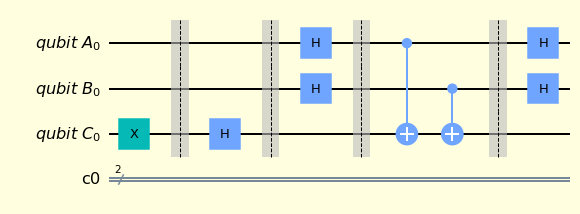

In [8]:
qc.barrier()
qc.h(qregA)
qc.h(qregB)
qc.draw(output='mpl', style=style) 

Apply the hadamard gate to the qubits $A$ and $B$

$$|\psi_{4} >_{ABC} =  (H \otimes H \otimes I) |\psi_{3} >_{ABC} =  H \frac{1}{\sqrt{2}}  \Big(  |0 >_{A}  -  | 1 >_{A} \Big)  \frac{1}{\sqrt{2}} H \Big(  |0 >_{B}  -  | 1 >_{B} \Big)  I  \frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  -  | 1 >_{C} \Big) $$

$$|\psi_{4} >_{ABC} =    |1 >_{A}  | 1 >_{B}  \frac{1}{\sqrt{2}}  \Big(  |0 >_{C}  -  | 1 >_{C} \Big) $$

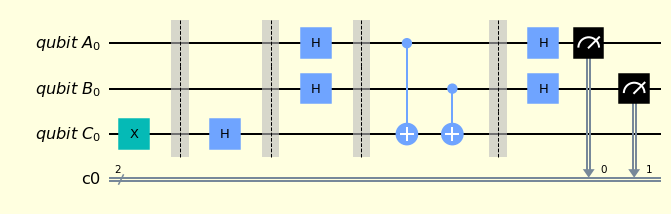

In [9]:
qc.measure(qregA, register1[0])
qc.measure(qregB, register1[1])
qc.draw(output='mpl', style=style)

In this case the measurement in the qubit $A$ and $B$ gives $\rightarrow$ $|1>_{A}|1>_{B}$

If $f$ is **balanced**, as in this example, a measurement of is certain **not** to return all 0s.

If $f$ is **constant**, a measurement is certain to return all 0

## Execute and get counts

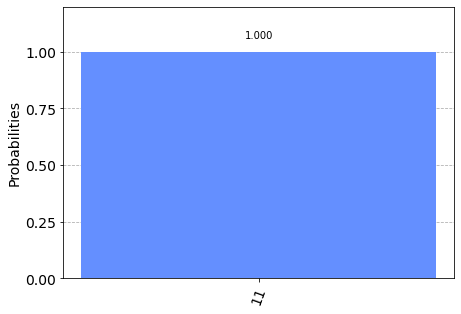

In [10]:
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Apply a constant oracle $(I \otimes I \otimes I)$

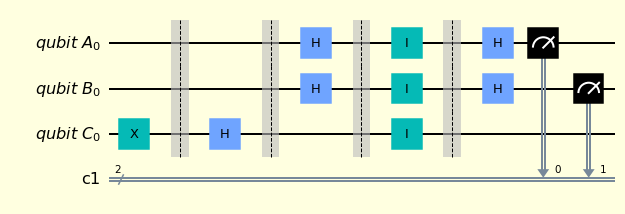

In [11]:
qregA_1 = QuantumRegister(1, name = 'qubit A')
qregB_2 = QuantumRegister(1, name = 'qubit B')
qregC_3 = QuantumRegister(1, name = 'qubit C')
register2 = ClassicalRegister(2) 

qcirc = QuantumCircuit(qregA_1, qregB_2, qregC_3 ,register2 )

qcirc.x(qregC_3)
qcirc.barrier()

qcirc.h(qregC_3)
qcirc.barrier()

qcirc.h(qregA_1)
qcirc.h(qregB_2)
qcirc.barrier()

# Constant oracle #
qcirc.i(qregA_1)
qcirc.i(qregB_2)
qcirc.i(qregC_3)
#################

qcirc.barrier()
qcirc.h(qregA_1)
qcirc.h(qregB_2)

qcirc.measure(qregA_1, register2[0])
qcirc.measure(qregB_2, register2[1])

qcirc.draw(output='mpl', style=style) 


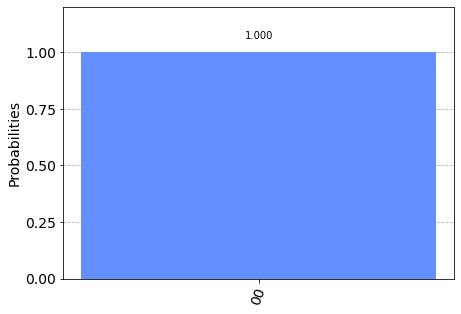

In [14]:
results2 = execute(qcirc, backend=backend, shots=shots).result()
answer2 = results2.get_counts()

plot_histogram(answer2)

# References: 

[1] Kaye, P. and Kaye, I.Q.C.P. and Laflamme, R. and Mosca, M. and Mosca, I.Q.C.M., An Introduction to Quantum Computing, OUP Oxford, 2007

[2] https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html